<a href="https://colab.research.google.com/github/anvq38/AI/blob/master/QLearning_Gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import gym
env = gym.make('FrozenLake-v0')

In [0]:
def q_learning(env, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.9, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.00005, tracking=False):
    # Initialize Q(s,a) table
    q_values = np.zeros((env.observation_space.n, env.action_space.n))

    history_rewards = []

    # Train the agent by playing multiple episodes and gain experience
    for episode in range(num_training_episodes):
        # Reset the environment and get the starting state
        state = env.reset()
        done = False
        total_reward = 0

        # If epsilon_decay_rate is 0.0, the value of epsilon is fixed at its starting value
        if epsilon_decay_rate == 0.0:
            epsilon = epsilon_start
        else:
            epsilon = epsilon_min + (epsilon_start - epsilon_min)*np.exp(-epsilon_decay_rate*episode)
        
        # Play one episode
        while not done:
            # Choose an action following an epsilon-greedy policy
            if np.random.uniform(0,1) < epsilon:
                action = np.random.randint(env.action_space.n)
            else:
                action = np.argmax(q_values[state])
            
            # Take the chosen action and observe the experience
            next_state, reward, done, info = env.step(action)

            # Use the observation to update Q(s,a)
            q_values[state,action] = (1-alpha)*q_values[state,action] + alpha*(reward + gamma * np.max(q_values[next_state]))

            total_reward += reward

            state = next_state

        # After every validation_interval episode, we evaluate the policy obtained so far
        # by using it to play 1000 games and computing the average reward.
        if (episode % validation_interval) == 0:
            avg_reward = play_multiple_times(env, q_values, num_validation_episodes=1000)
            history_rewards.append(avg_reward)
            if tracking:
                print('Episode: {} - epsilon: {} - average reward: {}'.format(episode, epsilon, avg_reward))

    return q_values, history_rewards

In [0]:
def play_multiple_times(env, q_values, num_validation_episodes=1000):
    """
    Check the quality of the policy encoded by the Q-value table.
    Use that policy to play multiple games, and get the average reward.
    """
    all_rewards = []

    for episode in range(num_validation_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(q_values[state])
            next_state, reward, done, info = env.step(action)

            episode_reward += reward
            state = next_state
            if done:
                all_rewards.append(episode_reward)
    
    return np.mean(all_rewards)

In [0]:
# Let's run this line of code multiple times.
# Does it succeed to find a good policy all the times?
q_values, history_rewards = q_learning(env, num_training_episodes=20001, 
           validation_interval=1000, alpha=0.01, gamma=0.95, 
           epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.0,
           tracking=True)

Episode: 0 - epsilon: 0.1 - average reward: 0.0
Episode: 1000 - epsilon: 0.1 - average reward: 0.0
Episode: 2000 - epsilon: 0.1 - average reward: 0.0
Episode: 3000 - epsilon: 0.1 - average reward: 0.09
Episode: 4000 - epsilon: 0.1 - average reward: 0.104
Episode: 5000 - epsilon: 0.1 - average reward: 0.1
Episode: 6000 - epsilon: 0.1 - average reward: 0.091
Episode: 7000 - epsilon: 0.1 - average reward: 0.245
Episode: 8000 - epsilon: 0.1 - average reward: 0.221
Episode: 9000 - epsilon: 0.1 - average reward: 0.232
Episode: 10000 - epsilon: 0.1 - average reward: 0.217
Episode: 11000 - epsilon: 0.1 - average reward: 0.356
Episode: 12000 - epsilon: 0.1 - average reward: 0.381
Episode: 13000 - epsilon: 0.1 - average reward: 0.699
Episode: 14000 - epsilon: 0.1 - average reward: 0.708
Episode: 15000 - epsilon: 0.1 - average reward: 0.685
Episode: 16000 - epsilon: 0.1 - average reward: 0.709
Episode: 17000 - epsilon: 0.1 - average reward: 0.713
Episode: 18000 - epsilon: 0.1 - average reward: 0.

In [0]:
def perform_rl_algorithm_multiple_times(env, num_times=100, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.95, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.0):
    """
    If we run an algorithm with some hyperparameter settings only once, 
    its success or failure can be merely due to chance.
    To verify more accurately the performance of an algorithm and its certain hyperparameter settings,
    we need to run the algorithm with such hyperparameter settings multiple times.
    """
    all_history = []

    for i in range(num_times):
        print('Run {}'.format(i))
        q_values, history_reward = q_learning(env, num_training_episodes, validation_interval, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay_rate, tracking=False)
        all_history.append(history_reward)
    
    mean_reward = np.array(all_history)
    mean_reward = np.mean(mean_reward, axis=0)
    mean_reward = np.vstack((np.arange(num_training_episodes, step=validation_interval),mean_reward))
    return mean_reward

In [0]:
# Let's try q-learing with epsilon-greedy having a small fixed epsilon value
mean_reward_small_epsilon = perform_rl_algorithm_multiple_times(env, num_times=10,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.01,
                                                  gamma=0.95,
                                                  epsilon_start=0.1,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.0
                                                  )

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


In [0]:
# Let's try q-learning with epsilon-greedy and the epsilon value is decayed over time
mean_reward_epsilon_decay = perform_rl_algorithm_multiple_times(env, num_times=10,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.01,
                                                  gamma=0.95,
                                                  epsilon_start=1.0,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00005
                                                  )

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

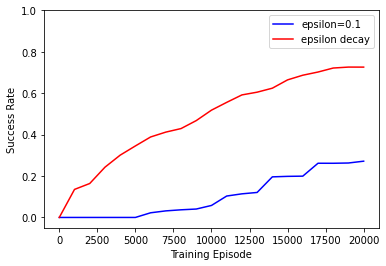

In [0]:
# Which algorithm/hyperparameter setting has the faster speed?
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_small_epsilon[0],mean_reward_small_epsilon[1], 'b-', label='epsilon=0.1')
plt.plot(mean_reward_epsilon_decay[0], mean_reward_epsilon_decay[1], 'r-', label='epsilon decay')
plt.legend()